In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [86]:
# import
sc = pd.read_csv('SuperCam_pred_true_summary.csv').reset_index() # the index will be the sample label
sc['inst'] = 'SuperCam'
cc = pd.read_csv('ChemCam_pred_true_summary.csv').reset_index()
cc['inst'] = 'ChemCam'
cc.rename(columns={'Target':'target'}, inplace=True) # match to SC

# not exactly the same elements analyzed
cc_comps = [x.split('_')[0] for x in cc.columns if 'actual' in x]
sc_comps = [x.split('_')[0] for x in sc.columns if 'actual' in x]

print(cc_comps)
print(sc_comps)
print(set(cc_comps) - set(sc_comps))

comps = ['SiO2','TiO2','Al2O3','FeOT','MnO','MgO','CaO','Na2O','K2O']

# merge
df = pd.concat([sc,cc], ignore_index=True)

['Al2O3', 'CaO', 'FeOT', 'K2O', 'MgO', 'MnO', 'Na2O', 'SiO2', 'TiO2']
['Al2O3', 'CaO', 'FeOT', 'K2O', 'MgO', 'Na2O', 'SiO2', 'TiO2']
{'MnO'}


### Histogram comparing standard compositions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

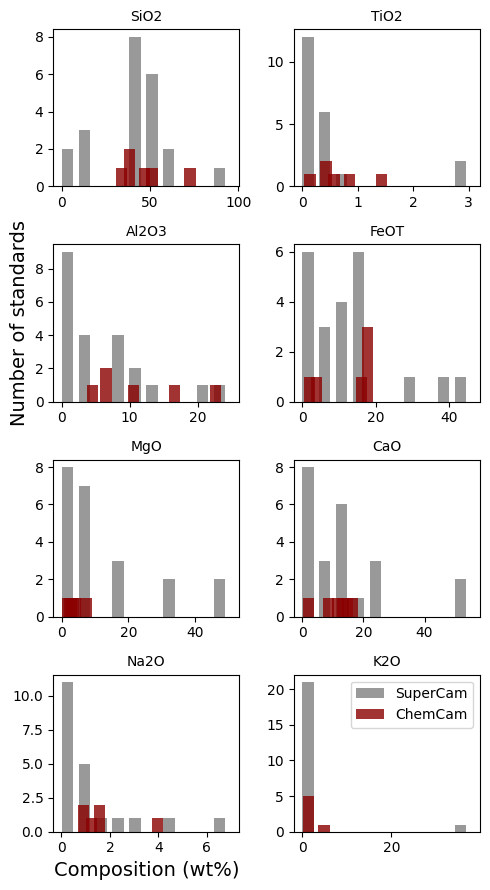

In [95]:
f1 = 14
f2=10

fig, ax = plt.subplots(nrows=4, 
                       ncols=2,
                       figsize=(5,9))

xs = [0,0,1,1,2,2,3,3]
ys = [0,1,0,1,0,1,0,1]
i = 0
comp_s = ['SiO2','TiO2','Al2O3','FeOT','MgO','CaO','Na2O','K2O']
for oxide in comp_s:
    col = f'{oxide}_actual'
    
    m1 = max(cc[col].values)
    w=m1/10
    if oxide != 'MnO':
        m2 = max(sc[col].values)
        m = max([m1,m2])
        w=m/15

    # SuperCam
    if oxide != 'MnO':
        ax[xs[i],ys[i]].hist(sc[col].dropna(), alpha=0.8, width=w, color='grey', label='SuperCam')
    
    # ChemCam
    ax[xs[i],ys[i]].hist(cc[col].dropna(), alpha=0.8, width=w, color='darkred', label='ChemCam')
    
    ax[xs[i],ys[i]].set_title(oxide, fontsize=f2)
    
    i+=1
    
ax[1,0].set_ylabel('Number of standards', fontsize=f1)
ax[3,0].set_xlabel('Composition (wt%)', fontsize=f1)

plt.legend()
plt.tight_layout()
plt.savefig('composition_histogram.eps', dpi=600)
plt.show()

### Predicted vs. True overall for SC and CC
3x3 figure

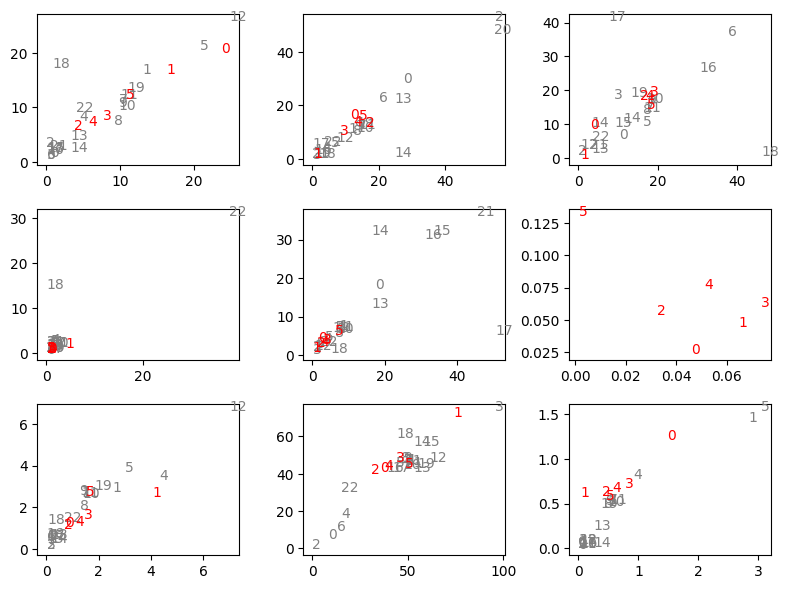

In [75]:
xs=[0,0,0,1,1,1,2,2,2]
ys=[0,1,2,0,1,2,0,1,2]

f1 = 14
f2=10

fig, ax = plt.subplots(3,3,figsize=(8,6))

i=0

for oxide in comps:
    pred = f'{oxide}_mean'
    std = f'{oxide}_std'
    true = f'{oxide}_actual'
    
    temp = df[df[pred].notna()].copy()
    
    for row in temp.index:
        c = 'red' if temp.loc[row]['inst'] == 'ChemCam' else 'grey'
        label = temp.loc[row]['index']
        x = temp.loc[row][true]
        y = temp.loc[row][pred]
        
        ax[xs[i],ys[i]].annotate(label, (x,y), color=c)
        
    ax[xs[i],ys[i]].scatter(temp[true], temp[pred], marker='')
    
    i+=1
    
plt.tight_layout()
plt.show()

In [70]:
temp.loc[row]

index                     0
target          Kga-d_Med-S
n_dups                   24
Al2O3_actual          23.71
Al2O3_mean        19.958333
Al2O3_std          0.940821
CaO_actual            11.46
CaO_mean          15.195833
CaO_std            1.320895
FeOT_actual          2.8302
FeOT_mean          8.729167
FeOT_std           2.044819
K2O_actual             0.26
K2O_mean           0.225417
K2O_std            0.039118
MgO_actual             1.68
MgO_mean           3.441667
MgO_std            0.507266
Na2O_actual            0.72
Na2O_mean           1.07625
Na2O_std           0.097348
SiO2_actual           35.64
SiO2_mean         41.070833
SiO2_std           1.427214
TiO2_actual            1.47
TiO2_mean           1.21875
TiO2_std           0.138134
inst                ChemCam
MnO_actual         0.045965
MnO_mean           0.024167
MnO_std            0.015012
Name: 23, dtype: object